Analysis comparing aggregation models.

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import momepy as mm
from libpysal.weights import KNN, DistanceBand
from timeit import default_timer as timer
import numpy as np
from tqdm import tqdm

## Generate neighbors

In [ ]:
gpkg = "files/prague_isuf.gpkg"

buildings = gpd.read_file(gpkg, layer="buildings")
streets = gpd.read_file(gpkg, layer='streets')
centroids = gpd.read_file(gpkg, layer='centroids')

buildings['uID'] = range(len(buildings))

tessellation = gpd.read_file(gpkg, layer="tessellation")
tessellation["cellarea"] = tessellation.geometry.area
#
if "cellarea" not in buildings.columns:
    buildings = buildings.merge(tessellation[["uID", "cellarea"]], on="uID")

start = timer()

queen4 = mm.Queen_higher(tessellation, 4)

mean_distances = []
max_distance = []
neighbours = []
variance_area = []  # coefficient of variation
total_area = []

for index, row in tqdm(tessellation.iterrows(), total=tessellation.shape[0]):
    neighb = queen4.neighbors[index]
    vicinity = tessellation.iloc[neighb]

    neighbours.append(len(neighb))
    if len(neighb) > 0:
        variance_area.append(np.nanstd(vicinity['cellarea']) / np.nanmean(vicinity['cellarea']))
        total_area.append(sum(vicinity['cellarea']))

        centroid = row.geometry.centroid
        distances = []
        for idx, r in vicinity.iterrows():
            distances.append(r.geometry.distance(centroid))

        mean_distances.append(np.nanmean(distances))
        max_distance.append(np.nanmax(distances))
    else:
        variance_area.append(0)
        total_area.append(0)
        mean_distances.append(0)
        max_distance.append(0)

tessellation['q4_md'] = mean_distances
tessellation['q4_n'] = neighbours
tessellation['q4_va'] = variance_area
tessellation['q4_a'] = total_area
tessellation['q4_maxd'] = max_distance
print('Queen 4 done in', timer() - start, 'seconds')

start = timer()

queen9 = mm.Queen_higher(tessellation, 9)

mean_distances = []
max_distance = []
neighbours = []
variance_area = []  # coefficient of variation
total_area = []

for index, row in tqdm(tessellation.iterrows(), total=tessellation.shape[0]):
    neighb = queen9.neighbors[index]
    vicinity = tessellation.iloc[neighb]

    neighbours.append(len(neighb))
    if len(neighb) > 0:
        variance_area.append(np.nanstd(vicinity['cellarea']) / np.nanmean(vicinity['cellarea']))
        total_area.append(sum(vicinity['cellarea']))

        centroid = row.geometry.centroid
        distances = []
        for idx, r in vicinity.iterrows():
            distances.append(r.geometry.distance(centroid))

        mean_distances.append(np.nanmean(distances))
        max_distance.append(np.nanmax(distances))
    else:
        variance_area.append(0)
        total_area.append(0)
        mean_distances.append(0)
        max_distance.append(0)

tessellation['q9_md'] = mean_distances
tessellation['q9_n'] = neighbours
tessellation['q9_va'] = variance_area
tessellation['q9_a'] = total_area
tessellation['q9_maxd'] = max_distance

print('Queen 9 done in', timer() - start, 'seconds')

tessellation.to_file(gpkg, layer='tessellation', driver='GPKG')

start = timer()

distance200 = DistanceBand.from_dataframe(buildings, 200, silence_warnings=True)

mean_distances = []
max_distance = []
neighbours = []
variance_area = []  # coefficient of variation
total_area = []

for index, row in tqdm(buildings.iterrows(), total=buildings.shape[0]):
    neighb = distance200.neighbors[index]
    vicinity = buildings.iloc[neighb]

    neighbours.append(len(neighb))
    if len(neighb) > 0:
        variance_area.append(np.nanstd(vicinity['cellarea']) / np.nanmean(vicinity['cellarea']))
        total_area.append(sum(vicinity['cellarea']))

        centroid = row.geometry.centroid
        distances = []
        for idx, r in vicinity.iterrows():
            distances.append(r.geometry.distance(centroid))

        mean_distances.append(np.nanmean(distances))
        max_distance.append(np.nanmax(distances))
    else:
        variance_area.append(0)
        total_area.append(0)
        mean_distances.append(0)
        max_distance.append(0)

buildings['d200_md'] = mean_distances
buildings['d200_n'] = neighbours
buildings['d200_va'] = variance_area
buildings['d200_a'] = total_area
buildings['d200_maxd'] = max_distance
print('Distance 200 done in', timer() - start, 'seconds')

start = timer()
distance400 = DistanceBand.from_dataframe(buildings, 400, silence_warnings=True)

mean_distances = []
max_distance = []
neighbours = []
variance_area = []  # coefficient of variation
total_area = []

for index, row in tqdm(buildings.iterrows(), total=buildings.shape[0]):
    neighb = distance400.neighbors[index]
    vicinity = buildings.iloc[neighb]

    neighbours.append(len(neighb))
    if len(neighb) > 0:
        variance_area.append(np.nanstd(vicinity['cellarea']) / np.nanmean(vicinity['cellarea']))
        total_area.append(sum(vicinity['cellarea']))

        centroid = row.geometry.centroid
        distances = []
        for idx, r in vicinity.iterrows():
            distances.append(r.geometry.distance(centroid))

        mean_distances.append(np.nanmean(distances))
        max_distance.append(np.nanmax(distances))
    else:
        variance_area.append(0)
        total_area.append(0)
        mean_distances.append(0)
        max_distance.append(0)

buildings['d400_md'] = mean_distances
buildings['d400_n'] = neighbours
buildings['d400_va'] = variance_area
buildings['d400_a'] = total_area
buildings['d400_maxd'] = max_distance
print('Distance 400 done in', timer() - start, 'seconds')


start = timer()
knn70 = KNN.from_dataframe(buildings, k=80)

mean_distances = []
max_distance = []
neighbours = []
variance_area = []  # coefficient of variation
total_area = []

for index, row in tqdm(buildings.iterrows(), total=buildings.shape[0]):
    neighb = knn70.neighbors[index]
    vicinity = buildings.iloc[neighb]

    neighbours.append(len(neighb))
    if len(neighb) > 0:
        variance_area.append(
            np.nanstd(vicinity["cellarea"]) / np.nanmean(vicinity["cellarea"])
        )
        total_area.append(sum(vicinity["cellarea"]))

        centroid = row.geometry.centroid
        distances = []
        for idx, r in vicinity.iterrows():
            distances.append(r.geometry.distance(centroid))

        mean_distances.append(np.nanmean(distances))
        max_distance.append(np.nanmax(distances))
    else:
        variance_area.append(0)
        total_area.append(0)
        mean_distances.append(0)
        max_distance.append(0)

buildings["knn70_md"] = mean_distances
buildings["knn70_n"] = neighbours
buildings["knn70_va"] = variance_area
buildings["knn70_a"] = total_area
buildings["knn70_maxd"] = max_distance
print("KNN 70 done in", timer() - start, "seconds")

start = timer()
knn320 = KNN.from_dataframe(buildings, k=431)

mean_distances = []
max_distance = []
neighbours = []
variance_area = []  # coefficient of variation
total_area = []

for index, row in tqdm(buildings.iterrows(), total=buildings.shape[0]):
    neighb = knn320.neighbors[index]
    vicinity = buildings.iloc[neighb]

    neighbours.append(len(neighb))
    if len(neighb) > 0:
        variance_area.append(
            np.nanstd(vicinity["cellarea"]) / np.nanmean(vicinity["cellarea"])
        )
        total_area.append(sum(vicinity["cellarea"]))

        centroid = row.geometry.centroid
        distances = []
        for idx, r in vicinity.iterrows():
            distances.append(r.geometry.distance(centroid))

        mean_distances.append(np.nanmean(distances))
        max_distance.append(np.nanmax(distances))
    else:
        variance_area.append(0)
        total_area.append(0)
        mean_distances.append(0)
        max_distance.append(0)

buildings["knn320_md"] = mean_distances
buildings["knn320_n"] = neighbours
buildings["knn320_va"] = variance_area
buildings["knn320_a"] = total_area
buildings["knn320_maxd"] = max_distance
print("KNN 320 done in", timer() - start, "seconds")


buildings.to_file(gpkg, layer="buildings", driver="GPKG")
tessellation.to_file(gpkg, layer='tessellation', driver='GPKG')
streets.to_file(gpkg, layer='streets', driver='GPKG')
centroids.to_file(gpkg, layer='centroids', driver='GPKG')

# FIX FOR THE US PAPER 191217
tessellation = gpd.read_file("files/cases.shp.gpkg", layer="tessellation_buffered")

cases = {
    "vinohrady": 89507,
    "oldtown": 151686,
    "villas": 33231,
    "modernist": 109749,
    "industry": 57315,
}

for case in cases:
    id = (buildings.loc[buildings.uID == cases[case]].index)[0]
    neigh = knn70.neighbors[id]
    tessellation[tessellation["uID"].isin(buildings.loc[neigh].uID)].to_file(
        "files/cases.gpkg", layer="{c}_knn70".format(c=case), driver="GPKG"
    )

for case in cases:
    id = (buildings.loc[buildings.uID == cases[case]].index)[0]
    neigh = knn320.neighbors[id]
    tessellation[tessellation["uID"].isin(buildings.loc[neigh].uID)].to_file(
        "files/cases.gpkg", layer="{c}_knn320".format(c=case), driver="GPKG"
    )


## Prepare data for plots

In [ ]:
buildings = gpd.read_file(
    "/Users/martin/Dropbox/StrathUni/PhD/Sample Data/ISUF19/prague_isuf.gpkg",
    layer="buildings",
)
tessellation = gpd.read_file(
    "/Users/martin/Dropbox/StrathUni/PhD/Sample Data/ISUF19/cases.shp.gpkg",
    layer="tessellation_buffered",
)

queen9 = mm.Queen_higher(9, geodataframe=tessellation)

cases = {
    "vinohrady": 89507,
    "oldtown": 151686,
    "villas": 33231,
    "modernist": 109749,
    "industry": 57315,
}


for case in cases:
    id = list(tessellation.loc[tessellation.uID == cases[case]].index)[0]
    neigh = queen9.neighbors[id]
    tessellation.iloc[neigh].to_file(
        "/Users/martin/Dropbox/StrathUni/PhD/Sample Data/ISUF19/cases.gpkg",
        layer="{c}_q9".format(c=case),
        driver="GPKG",
    )

bnuildings_sample = buildings[buildings["uID"].isin(tessellation.uID)]

distance200 = DistanceBand.from_dataframe(bnuildings_sample, 200, silence_warnings=True)

for case in cases:
    id = (bnuildings_sample.loc[bnuildings_sample.uID == cases[case]].index)[0]
    neigh = distance200.neighbors[id]
    tessellation[tessellation["uID"].isin(bnuildings_sample.loc[neigh].uID)].to_file(
        "/Users/martin/Dropbox/StrathUni/PhD/Sample Data/ISUF19/cases.gpkg",
        layer="{c}_d200".format(c=case),
        driver="GPKG",
    )

distance400 = DistanceBand.from_dataframe(bnuildings_sample, 400, silence_warnings=True)

for case in cases:
    id = (bnuildings_sample.loc[bnuildings_sample.uID == cases[case]].index)[0]
    neigh = distance400.neighbors[id]
    tessellation[tessellation["uID"].isin(bnuildings_sample.loc[neigh].uID)].to_file(
        "/Users/martin/Dropbox/StrathUni/PhD/Sample Data/ISUF19/cases.gpkg",
        layer="{c}_d400".format(c=case),
        driver="GPKG",
    )

knn70 = KNN.from_dataframe(bnuildings_sample, k=70)

for case in cases:
    id = (bnuildings_sample.loc[bnuildings_sample.uID == cases[case]].index)[0]
    neigh = knn70.neighbors[id]
    tessellation[tessellation["uID"].isin(bnuildings_sample.loc[neigh].uID)].to_file(
        "/Users/martin/Dropbox/StrathUni/PhD/Sample Data/ISUF19/cases.gpkg",
        layer="{c}_knn70".format(c=case),
        driver="GPKG",
    )

knn320 = KNN.from_dataframe(bnuildings_sample, k=320)

for case in cases:
    id = (bnuildings_sample.loc[bnuildings_sample.uID == cases[case]].index)[0]
    neigh = knn320.neighbors[id]
    tessellation[tessellation["uID"].isin(bnuildings_sample.loc[neigh].uID)].to_file(
        "/Users/martin/Dropbox/StrathUni/PhD/Sample Data/ISUF19/cases.gpkg",
        layer="{c}_knn320".format(c=case),
        driver="GPKG",
    )

service200 = gpd.read_file(
    "/Users/martin/Dropbox/StrathUni/PhD/Sample Data/ISUF19/s200_subset.shp"
)
service400 = gpd.read_file(
    "/Users/martin/Dropbox/StrathUni/PhD/Sample Data/ISUF19/s400_subset.shp"
)

centroids = bnuildings_sample.copy()
centroids["geometry"] = centroids.geometry.centroid


def snap_to_line(points, lines, tolerance=100, prefer_endpoint=False, sindex=None):
    """
    Attempt to snap a line to the nearest line, within tolerance distance.
    Lines must be in a planar (not geographic) projection and points
    must be in the same projection.
    Parameters
    ----------
    points : GeoPandas.DataFrame
        points to snap
    lines : GeoPandas.DataFrame
        lines to snap against
    tolerance : int, optional (default: 100)
        maximum distance between line and point that can still be snapped
    prefer_endpoint : bool, optional (default False)
        if True, will try to match to the nearest endpoint on the nearest line
        provided that the distance to that endpoint is less than tolerance.
        NOTE: NOT YET WORKING PROPERLY - DO NOT USE!
    Returns
    -------
    geopandas.GeoDataFrame
        output data frame containing:
        * all columns from points except geometry
        * geometry: snapped geometry
        * snap_dist: distance between original point and snapped location
        * nearby: number of nearby lines within tolerance
        * is_endpoint: True if successfully snapped to endpoint
        * any columns joined from lines
    """

    line_columns = list(set(lines.columns).difference({"geometry"}))
    columns = ["geometry", "snap_dist", "nearby", "is_endpoint"] + line_columns

    def snap(point):
        # point = record.geometry
        x, y = point.coords[0][:2]

        # Search window
        window = (x - tolerance, y - tolerance, x + tolerance, y + tolerance)

        # find nearby features
        hits = lines.iloc[list(sindex.intersection(window))].copy()

        # calculate distance to point and
        hits["dist"] = hits.distance(point)
        within_tolerance = hits[hits.dist <= tolerance]

        if len(within_tolerance):
            # find nearest line segment that is within tolerance
            closest = within_tolerance.nsmallest(1, columns=["dist"]).iloc[0]
            line = closest.geometry

            dist = closest.dist
            snapped = None
            is_endpoint = False
            if prefer_endpoint:
                # snap to the nearest endpoint if it is within tolerance
                endpoints = [
                    (pt, point.distance(pt))
                    for pt in (Point(line.coords[0]), Point(line.coords[-1]))
                    if point.distance(pt) < tolerance
                ]
                endpoints = sorted(endpoints, key=lambda x: x[1])
                if endpoints:
                    snapped, dist = endpoints[0]
                    is_endpoint = True

            if snapped is None:
                snapped = line.interpolate(line.project(point))

            values = [snapped, dist, len(within_tolerance), int(is_endpoint)]

            # Copy attributes from line to point
            values.extend([closest[c] for c in line_columns])

            return gpd.GeoSeries(values, index=columns)

        # create empty record
        # return pd.Series(([None] * 4) + [None for c in line_columns], index=columns)
        return pd.Series([None] * len(columns), index=columns)

    if sindex is None:
        sindex = lines.sindex
        # Note: the spatial index is ALWAYS based on the integer index of the
        # geometries and NOT their index

    tqdm.pandas()
    snapped = gpd.GeoDataFrame(points.geometry.progress_apply(snap), crs=points.crs)
    points = points.drop(columns=["geometry"]).join(snapped)
    return points.loc[~points.geometry.isnull()].copy()


streets = gpd.read_file(
    "/Users/martin/Dropbox/StrathUni/PhD/Sample Data/ISUF19/cases_net.gpkg",
    layer="cases_net",
)
snapped = snap_to_line(centroids, streets)

sindex = snapped.sindex

service200["geometry"] = service200.geometry.convex_hull

for case in cases:
    geometry = service200[service200["uID"] == cases[case]].iloc[0].geometry
    possible_matches_index = list(sindex.intersection(geometry.bounds))
    possible_matches = snapped.iloc[possible_matches_index]
    vicinity = possible_matches[possible_matches.intersects(geometry)]
    tessellation[tessellation["uID"].isin(vicinity.uID)].to_file(
        "/Users/martin/Dropbox/StrathUni/PhD/Sample Data/ISUF19/cases.gpkg",
        layer="{c}_r200a".format(c=case),
        driver="GPKG",
    )

service400["geometry"] = service400.geometry.convex_hull

for case in cases:
    geometry = service400[service400["uID"] == cases[case]].iloc[0].geometry
    possible_matches_index = list(sindex.intersection(geometry.bounds))
    possible_matches = snapped.iloc[possible_matches_index]
    vicinity = possible_matches[possible_matches.intersects(geometry)]
    tessellation[tessellation["uID"].isin(vicinity.uID)].to_file(
        "/Users/martin/Dropbox/StrathUni/PhD/Sample Data/ISUF19/cases.gpkg",
        layer="{c}_r400a".format(c=case),
        driver="GPKG",
    )

types = ["r400a", "r200a"]
{
    "vinohrady": 89507,
    "oldtown": 151686,
    "villas": 33231,
    "modernist": 109749,
    "industry": 57315,
}


def _multi2single(gpdf):
    gpdf_singlepoly = gpdf[gpdf.geometry.type == "Polygon"]
    gpdf_multipoly = gpdf[gpdf.geometry.type == "MultiPolygon"]

    for i, row in gpdf_multipoly.iterrows():
        Series_geometries = pd.Series(row.geometry)
        df = pd.concat(
            [gpd.GeoDataFrame(row, crs=gpdf_multipoly.crs).T] * len(Series_geometries),
            ignore_index=True,
        )
        df["geometry"] = Series_geometries
        gpdf_singlepoly = pd.concat([gpdf_singlepoly, df])

    gpdf_singlepoly.reset_index(inplace=True, drop=True)
    return gpdf_singlepoly


path = "/Users/martin/Dropbox/StrathUni/PhD/Sample Data/ISUF19/cases.gpkg"
for type in types:
    vinohrady = gpd.read_file(path, layer="vinohrady_{}".format(type))
    oldtown = gpd.read_file(path, layer="oldtown_{}".format(type))
    villas = gpd.read_file(path, layer="villas_{}".format(type))
    modernist = gpd.read_file(path, layer="modernist_{}".format(type))
    industry = gpd.read_file(path, layer="industry_{}".format(type))

    vinohrady["diss"] = 0
    vinohrady = _multi2single(vinohrady.dissolve(by="diss"))
    oldtown["diss"] = 0
    oldtown = _multi2single(oldtown.dissolve(by="diss"))
    villas["diss"] = 0
    villas = _multi2single(villas.dissolve(by="diss"))
    modernist["diss"] = 0
    modernist = _multi2single(modernist.dissolve(by="diss"))
    industry["diss"] = 0
    industry = _multi2single(industry.dissolve(by="diss"))

    merged = vinohrady.append(oldtown.append(villas.append(modernist.append(industry))))
    merged.to_file(path, layer=type, driver="GPKG")



In [2]:
data = gpd.read_file('/Users/martin/Dropbox/Academia/Data/Geo/Prague/ISUF19/prague_isuf.gpkg', layer='buildings')
columns = ['d200_md', 'd200_n', 'd200_va', 'd200_a',
           'd200_maxd', 'd400_md', 'd400_n', 'd400_va', 'd400_a', 'd400_maxd',
           'knn70_md', 'knn70_n', 'knn70_va', 'knn70_a', 'knn70_maxd', 'knn320_md',
           'knn320_n', 'knn320_va', 'knn320_a', 'knn320_maxd', 'r200a_md', 'r200a_n',
           'r200a_va', 'r200a_a', 'r200a_maxd', 'r400a_md', 'r400a_n', 'r400a_va',
           'r400a_a', 'r400a_maxd', 'q4_md', 'q4_n', 'q4_va', 'q4_a', 'q4_maxd',
           'q9_md', 'q9_n', 'q9_va', 'q9_a', 'q9_maxd']

types = ['d200', 'd400', 'knn70', 'knn320', 'r200a', 'r400a', 'q4', 'q9']
measures = ['md', 'n', 'va', 'a', 'maxd']

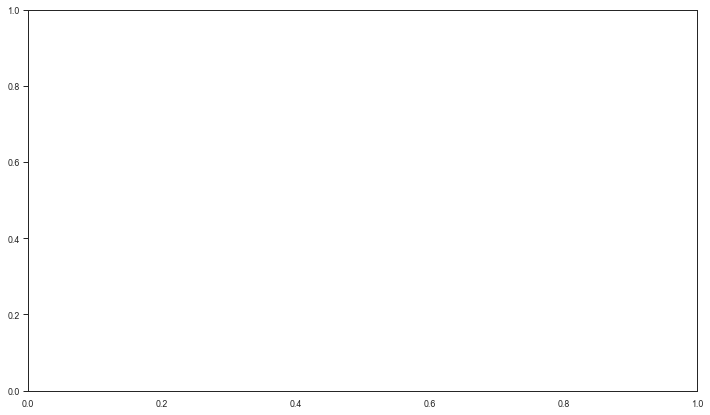

In [3]:
summary = pd.DataFrame(index=types)

for i in types:
    for m in measures:
        summary.at[i, '{m}_mean'.format(m=m)] = np.nanmean(data['{i}_{m}'.format(i=i, m=m)])
        summary.at[i, '{m}_median'.format(m=m)] = np.nanmedian(data['{i}_{m}'.format(i=i, m=m)])
        summary.at[i, '{m}_stdev'.format(m=m)] = np.nanstd(data['{i}_{m}'.format(i=i, m=m)])

sbn.set_style('ticks', {'xtick.bottom': False, 'ytick.left': True, 'legend.frameon': False})
sbn.set_context(context='paper', font_scale=1, rc=None)
f, ax = plt.subplots(figsize=(12, 7))
# sbn.distplot(data['d400_maxd'])
small = ['q4', 'knn70', 'r200a', 'd200']
large = ['q9', 'knn320', 'r400a', 'd400']


In [4]:
summary

,md_mean,md_median,md_stdev,n_mean,n_median,n_stdev,va_mean,va_median,va_stdev,a_mean,a_median,a_stdev,maxd_mean,maxd_median,maxd_stdev
d200,117.840319,119.094090,12.335967,110.022003,107.0,55.251497,1.206831,1.156109,0.407756,125607.929820,126377.077573,16645.899030,191.226524,192.794562,9.234644
d400,239.837529,241.773290,24.746189,347.232607,342.0,158.612283,1.497505,1.445989,0.376434,461262.812889,486536.385789,70650.317530,392.291674,393.482057,11.746102
knn70,118.651123,100.616550,66.190648,80.000000,80.0,0.000000,1.140180,1.108066,0.416265,122776.380929,91980.026148,96924.397015,188.446526,161.963219,97.705985
knn320,317.744308,280.266111,138.973953,431.000000,431.0,0.000000,1.542613,1.510122,0.369543,699415.587825,610076.095339,343077.502332,511.740338,455.571140,219.173073
r200a,84.547318,88.937252,22.604771,56.658190,52.0,36.533079,0.992782,0.945067,0.453627,58263.702551,60908.254988,23036.882863,162.709063,173.069904,44.901203
r400a,166.949536,172.309337,35.591323,192.883092,182.0,117.716759,1.276029,1.247344,0.398347,214149.676435,221568.679121,77445.104364,328.563011,343.037228,68.664999
q4,114.106275,100.204739,49.662680,81.961721,80.0,24.575174,1.277842,1.232894,0.474845,162529.698787,126846.772877,118136.878236,254.573310,233.044385,108.525610
q9,304.369645,283.639224,101.999606,437.714580,431.0,158.103560,1.607826,1.569826,0.369270,845232.744075,731998.011703,460993.336181,695.380187,673.618006,209.977796


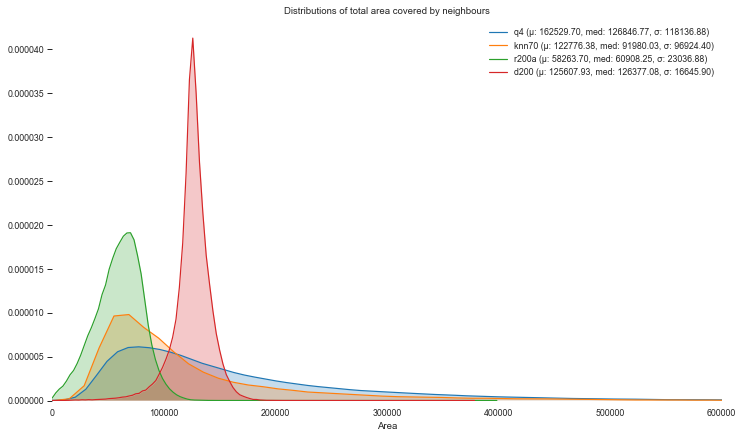

In [5]:
# area
f, ax = plt.subplots(figsize=(12, 7))
new_labels = []

for i in small:
    ax = sbn.kdeplot(data['{}_a'.format(i)], shade=True)
    # plt.ylim(0, 1.05)
    plt.xlim(0, 600000)
    new_labels.append('{i} (\u03bc: {m}, med: {med}, \u03c3: {sd})'.format(i=i, m="{0:.2f}".format(summary.loc[i, 'a_mean']),
                                                                           med="{0:.2f}".format(summary.loc[i, 'a_median']),
                                                                           sd="{0:.2f}".format(summary.loc[i, 'a_stdev'])))
sbn.despine(offset=10, trim=False, left=True, bottom=True)
legend = plt.legend(frameon=False)
# plt.grid(True, which='major', axis='x')
plt.xlabel("Area")
plt.title("Distributions of total area covered by neighbours")
for t, l in zip(legend.texts, new_labels):
    t.set_text(l)

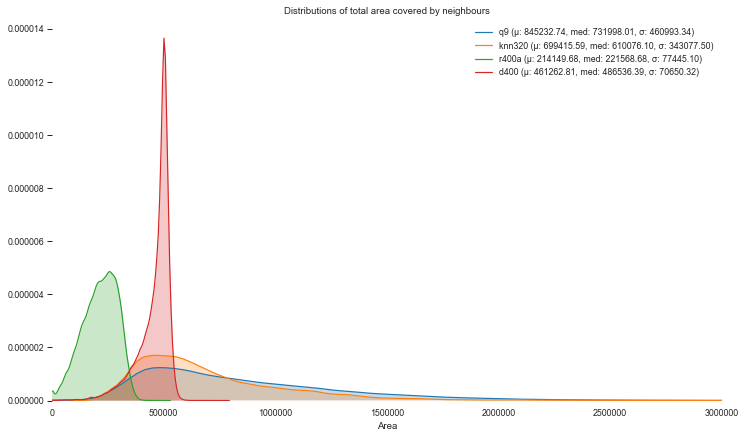

In [6]:
f, ax = plt.subplots(figsize=(12, 7))
new_labels = []

for i in large:
    ax = sbn.kdeplot(data['{}_a'.format(i)], shade=True)
    # plt.ylim(0, 1.05)
    plt.xlim(0, 3000000)
    new_labels.append('{i} (\u03bc: {m}, med: {med}, \u03c3: {sd})'.format(i=i, m="{0:.2f}".format(summary.loc[i, 'a_mean']),
                                                                           med="{0:.2f}".format(summary.loc[i, 'a_median']),
                                                                           sd="{0:.2f}".format(summary.loc[i, 'a_stdev'])))
sbn.despine(offset=10, trim=False, left=True, bottom=True)
legend = plt.legend(frameon=False)
# plt.grid(True, which='major', axis='x')
plt.xlabel("Area")
plt.title("Distributions of total area covered by neighbours")
for t, l in zip(legend.texts, new_labels):
    t.set_text(l)